In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [8]:
dataset_path="C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Pneumonia_X_Ray"
image_height,image_width=150,150

In [9]:
datagen=ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)

In [15]:
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,"train"),
    target_size=(image_height,image_width),
    batch_size=32,
    class_mode='binary',
    subset="training"
)

Found 1632 images belonging to 2 classes.


In [18]:
val_data=datagen.flow_from_directory(
    os.path.join(dataset_path,"train"),
    target_size=(image_height,image_width),
    batch_size=32,
    class_mode='binary',
    subset="validation"
)

Found 408 images belonging to 2 classes.


In [22]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(image_height,image_width,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

In [23]:
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy'],
    optimizer='adam'
)

In [24]:
history=model.fit(train_data,validation_data=val_data,epochs=10)

C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.8207 - loss: 0.6967 - val_accuracy: 0.9363 - val_loss: 0.1704
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.9346 - loss: 0.1705 - val_accuracy: 0.9730 - val_loss: 0.1009
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 226s 4s/step - accuracy: 0.9443 - loss: 0.1325 - val_accuracy: 0.9706 - val_loss: 0.0943
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 929ms/step - accuracy: 0.9730 - loss: 0.0700 - val_accuracy: 0.9412 - val_loss: 0.1609
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 758ms/step - accuracy: 0.9761 - loss: 0.0707 - val_accuracy: 0.9779 - val_loss: 0.0923
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 813ms/step - accuracy: 0.9735 - loss: 0.0670 - val_accuracy: 0.9755 - val_loss: 0.0929
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 786ms/step - accuracy: 0.9793 - loss: 0.0524 - val_accuracy: 0.9730 - val_loss: 0.0960
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 42s 815ms/step - accuracy: 0.9885 - loss: 0.0435 - val_accuracy: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


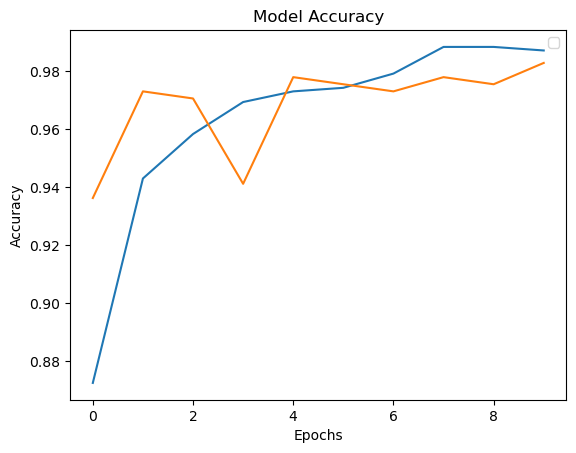

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


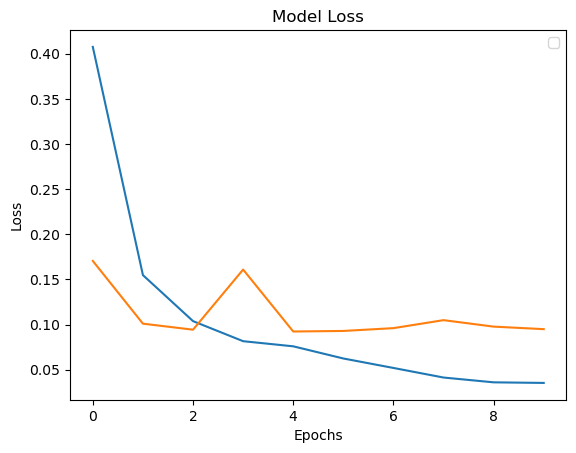

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [30]:
test_loss,test_accuracy=model.evaluate(val_data)
print("Loss is:",test_loss)
print("Accuracy is:",test_accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - accuracy: 0.9863 - loss: 0.0842
Loss is: 0.09486256539821625
Accuracy is: 0.9828431606292725


In [38]:
def predict_pneumonia(img_path):
    img=load_img(img_path,target_size=(image_height,image_width))
    image_array=img_to_array(img)/255.0
    image_array=np.expand_dims(image_array,axis=0)  #np.expand_dims adds an extra dimension, so the array fits the model's expected input shape.
    prediction=model.predict(image_array)
    if prediction>[0.5]:
        print("pneumonia Detected")
    else:
        print("No pneumonia Detected")
    plt.imshow(img)
    plt.plot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
pneumonia Detected


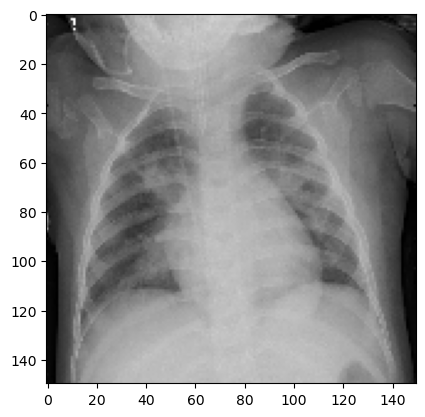

In [39]:
predict_pneumonia("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Pneumonia_X_Ray/train/PNEUMONIA/person9_bacteria_39.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
No pneumonia Detected


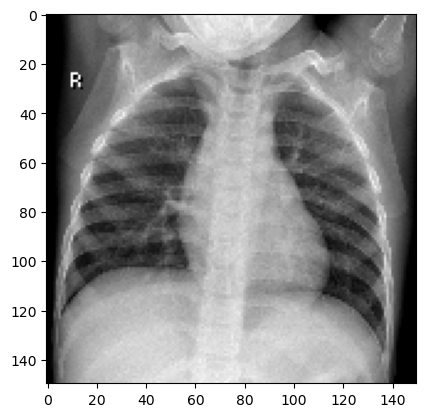

In [40]:
predict_pneumonia("C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/Pneumonia_X_Ray/train/NORMAL/NORMAL2-IM-0682-0001.jpeg")

In [ ]:
# os for path operations.
# numpy for numerical operations.
# tensorflow.keras for building and training a CNN.
# matplotlib.pyplot for plotting 

# Rescale: Divides pixel values by 255 to normalize them to the range [0, 1].
# Validation Split: Allocates 20% of data as a validation set.

# Datagen is an instance of the ImageDataGenerator class from Keras. 
# This class is used to perform data augmentation and preprocessing on images
# before feeding them into a neural network model for training or validation.

# This CNN model has several layers:

# 1) Convolutional Layers: The Conv2D layers learn features in the images. 
# The first layer uses 32 filters of size 3x3, and the second layer uses 64 filters.

# 2) Max Pooling Layers: The MaxPooling2D layers downsample the feature maps, 
# reducing dimensionality and computation.

# 3) Flatten Layer: Flatten() converts the 2D feature maps to a 1D vector.

# 4) Dense Layers:
# The first Dense layer has 128 neurons with ReLU activation.
# Dropout(0.5) helps prevent overfitting by randomly setting 50% of neurons 
# to zero during training.
# The output layer has a single neuron with a sigmoid activation for binary 
# classification (pneumonia vs. no pneumonia).
